<a href="https://colab.research.google.com/github/tpnguyen-1999/RFM-Analysis/blob/main/Nguyen_Thu_Phuong_RFM_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Context
SuperStore is a global retail company with a large customer base. To celebrate Christmas and New Year, the Marketing department wants to launch campaigns to show appreciation to loyal customers who have supported the company over the years, as well as to engage potential customers who could become loyal clients.

# 2. Problem Understanding
* The Marketing Director also proposed a plan to use the **RFM model** in Python to segment customers, and then launch **marketing campaigns to thank customers** for supporting the company over the past time. As well as **exploit potential customers** to become **loyal customers**.
* Why RFM?\
RFM is a marketing analysis technique that stands for Recency, Frequency, and Monetary Value
 - **Recency**: measures how recently a customer has made a purchase.
 - **Frequency**: measures how often a customer has made purchases.
 - **Monetary Value**: measures the total amount of money a customer has spent on purchases.\
RFM is used to identify and categorize customers based on their purchasing behavior and how recently and frequently they have made purchases, as well as the monetary value of those purchases.


# 3.EDA

## Import packages

In [ ]:
! pip install pandas-profiling
! pip install pydantic-settings
! pip install ydata_profiling
%pip install squarify

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import squarify


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=20d13a2e466d37e95b1235350937f0f856b324f48e9e9b500ea4128f295cb44f
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.

## 3.1. Data Understanding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/ecommerce retail.xlsx'
retail = pd.read_excel(path, sheet_name='ecommerce retail')
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
profile = ProfileReport(retail)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3.2.Report Takeaways and Data Cleaning

* InvoiceNo: no problem
* StockCode: no problem
* Description: 1454 missing values
* Quantity: remove negative values
* InvoiceDate: no problem
* UnitPrice: remove negative values
* CustomerID: 135080 missing values -> remove rows with no CustomerID
* Country: no problem
* Remove duplicates

In [ ]:
# Remove rows with negative quantity
retail = retail[retail['Quantity'] >0]

# Remove rows with negative unit price
retail = retail[retail['UnitPrice'] >0]


In [ ]:
# Remove missing customer ID
retail = retail[retail['CustomerID'].notnull()]
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Remove duplicates
retail_final = retail.drop_duplicates(subset=['InvoiceNo','StockCode','InvoiceDate','CustomerID'])
retail_final

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# 4. Data Processing

## 4.1.Adding RFM values

In [ ]:
retail_final['Day'] = pd.to_datetime(retail_final['InvoiceDate']).dt.date
retail_final['Month'] = retail_final['Day'].apply(lambda x: str(x)[:-3])
retail_final['Revenue'] = retail_final['Quantity']*retail_final['UnitPrice']
last_day = retail_final['Day'].max()

<ipython-input-9-a6d9861ffca1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_final['Day'] = pd.to_datetime(retail_final['InvoiceDate']).dt.date
<ipython-input-9-a6d9861ffca1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_final['Month'] = retail_final['Day'].apply(lambda x: str(x)[:-3])
<ipython-input-9-a6d9861ffca1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
rfm = retail_final.groupby('CustomerID').agg(
    Recency = ('Day', lambda x: last_day - x.max()),
    Frequency = ('CustomerID','count'),
    Monetary = ('Revenue','sum'),
    Start_Day = ('Day','min')).reset_index()

rfm['Recency'] = rfm['Recency'].dt.days.astype('int16')
rfm['Start_Day'] = pd.to_datetime(rfm['Start_Day'])

In [ ]:
# Using qcut() to create R,F,M
rfm['R'] = pd.qcut(rfm['Recency'],5, labels=range(1,6)).astype(str)
rfm['F'] = pd.qcut(rfm['Frequency'],5, labels=range(1,6)).astype(str)
rfm['M'] = pd.qcut(rfm['Monetary'],5, labels=range(1,6)).astype(str)
rfm['RFM'] = rfm.apply(lambda x: x.R + x.F + x.M, axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,Start_Day,R,F,M,RFM
0,12346.0,325,1,77183.60,2011-01-18,5,1,5,515
1,12347.0,2,182,4310.00,2010-12-07,1,5,5,155
2,12348.0,75,27,1595.64,2010-12-16,4,2,4,424
3,12349.0,18,73,1757.55,2011-11-21,2,4,4,244
4,12350.0,310,17,334.40,2011-02-02,5,2,2,522
...,...,...,...,...,...,...,...,...,...
4333,18280.0,277,10,180.60,2011-03-07,5,1,1,511
4334,18281.0,180,7,80.82,2011-06-12,5,1,1,511
4335,18282.0,7,12,178.05,2011-08-05,1,1,1,111
4336,18283.0,3,689,1970.28,2011-01-06,1,5,4,154


## 4.2.Merge Segmentation

In [ ]:
# Add segmentation
segmentation = pd.read_excel(path,sheet_name='Segmentation')
segmentation

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [ ]:
# Change segmentation to long form
segmentation['RFM Score'] = segmentation['RFM Score'].str.split(',')
segmentation = segmentation.explode('RFM Score').reset_index(drop=True)
segmentation

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [ ]:
rfm['RFM'] = rfm['RFM'].str.strip()
segmentation['RFM Score'] = segmentation['RFM Score'].str.strip()
rfm2 = pd.merge(rfm,segmentation,how='left',left_on='RFM',right_on='RFM Score')
rfm2.head()

,CustomerID,Recency,Frequency,Monetary,Start_Day,R,F,M,RFM,Segment,RFM Score
0,12346.0,325,1,77183.60,2011-01-18,5,1,5,515,Promising,515
1,12347.0,2,182,4310.00,2010-12-07,1,5,5,155,Cannot Lose Them,155
2,12348.0,75,27,1595.64,2010-12-16,4,2,4,424,Promising,424
3,12349.0,18,73,1757.55,2011-11-21,2,4,4,244,At Risk,244
4,12350.0,310,17,334.40,2011-02-02,5,2,2,522,Promising,522


## 4.3.Detecting Loyal customer

In [ ]:
# Loyal status
rfm2['Loyal_status'] = rfm2['Segment'].apply(lambda x: 'Loyal' if x in ('Champions','Loyal','Potential Loyalist') else 'Non loyal')

In [ ]:
# Average quantity and average revenue
rfm_average = retail_final.groupby('CustomerID').agg(
    Average_quantity = ('Quantity','mean'),
    Average_revenue = ('Revenue','mean')).reset_index()
rfm_average.head()

,CustomerID,Average_quantity,Average_revenue
0,12346.0,74215.000000,77183.600000
1,12347.0,13.505495,23.681319
2,12348.0,68.925926,59.097778
3,12349.0,8.643836,24.076027
4,12350.0,11.588235,19.670588


In [ ]:
rfm_final = pd.merge(rfm2, rfm_average, how='left', on='CustomerID')
rfm_final.head()

,CustomerID,Recency,Frequency,Monetary,Start_Day,R,F,M,RFM,Segment,RFM Score,Loyal_status,Average_quantity,Average_revenue
0,12346.0,325,1,77183.60,2011-01-18,5,1,5,515,Promising,515,Non loyal,74215.000000,77183.600000
1,12347.0,2,182,4310.00,2010-12-07,1,5,5,155,Cannot Lose Them,155,Non loyal,13.505495,23.681319
2,12348.0,75,27,1595.64,2010-12-16,4,2,4,424,Promising,424,Non loyal,68.925926,59.097778
3,12349.0,18,73,1757.55,2011-11-21,2,4,4,244,At Risk,244,Non loyal,8.643836,24.076027
4,12350.0,310,17,334.40,2011-02-02,5,2,2,522,Promising,522,Non loyal,11.588235,19.670588


# 5.Visualization

## 5.1.Using RFM model to launch Marketing campaign to thank customers

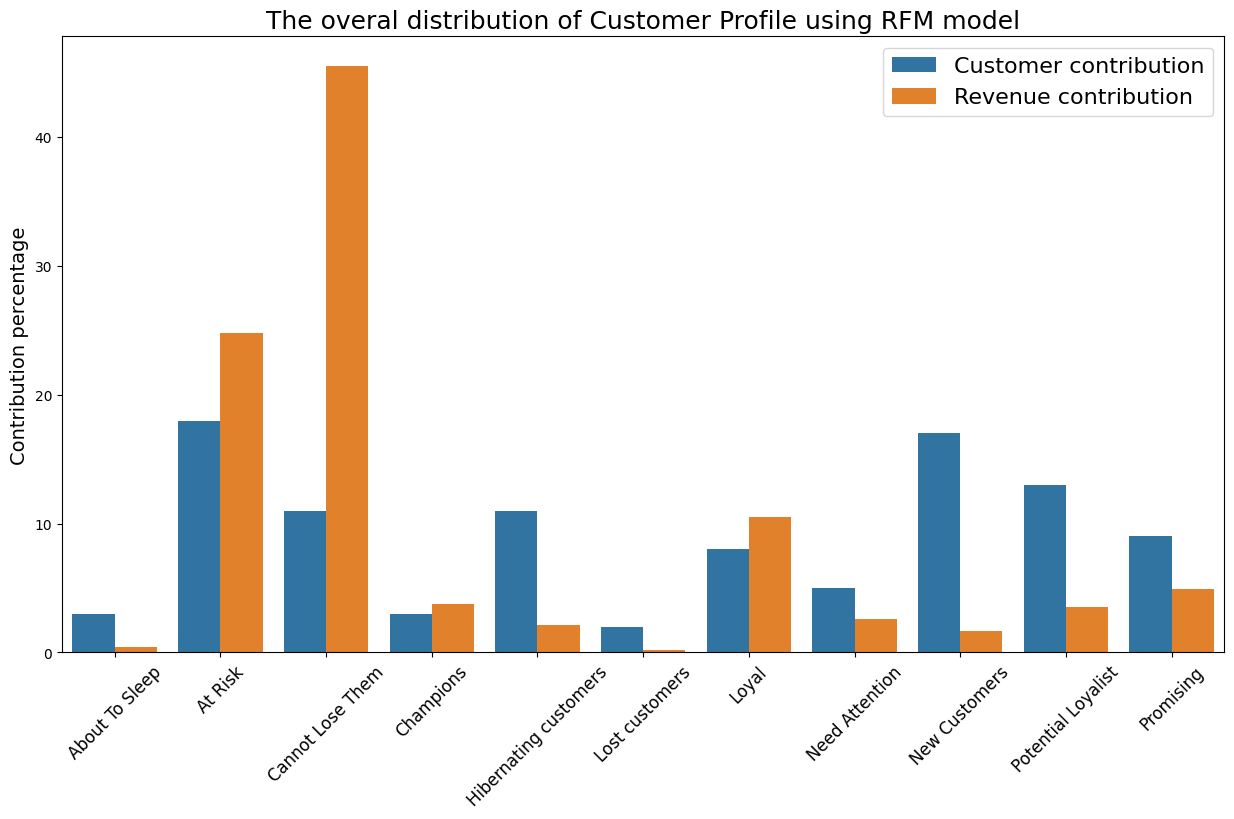

In [ ]:
# The number of customers, revenue by segment

segment_by_customer_count = rfm_final[['Segment','CustomerID']].groupby('Segment').count().reset_index().rename(columns={'CustomerID':'User_volume'})
segment_by_customer_count['Contribution_percent'] = round(segment_by_customer_count['User_volume']/segment_by_customer_count['User_volume'].sum()*100)
segment_by_customer_count['Type'] ='Customer contribution'

segment_by_revenue = rfm_final[['Segment','Monetary']].groupby('Segment').sum().reset_index().rename(columns={'Monetary':'Revenue'})
segment_by_revenue['Contribution_percent'] = round(segment_by_revenue['Revenue']/segment_by_revenue['Revenue'].sum()*100,2)
segment_by_revenue['Type'] = 'Revenue contribution'

segment_agg = pd.concat([segment_by_customer_count,segment_by_revenue])

plt.figure(figsize=(15,8))

sns.barplot(segment_agg,x='Segment',y='Contribution_percent',hue='Type')
plt.title('The overal distribution of Customer Profile using RFM model', fontsize=18)
plt.xlabel('')
plt.ylabel('Contribution percentage',fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.legend(fontsize=16)

plt.show()

* **At Risk** and **Cannot Lose Them** customer segments are crucial, as they represent the majority of customers and contribute significantly to revenue. However, their large proportion signals a potential risk. These customers have not engaged with the product for an extended period and are at a high risk of discontinuing its use.\
 **Recommendation**: Promotional campaigns or targeted announcements can be used to encourage customers to re-engage with the product

* **Loyal**, **New Customers**, **Potential Loyalist**, and **Promising** groups make up the majority of customers. However, most of them have a low transaction value, resulting in only a modest contribution to overall revenue.\
 **Recomendation**: Implement campaigns to incentivize higher consumption in order to boost customer spending


## 5.2.Exploit potential customers to become loyal customers

In [ ]:
# Function to calculate percentile thresholds
def percentile_threshold(column):
  p_25 = column.quantile(0.25)
  p_50 = column.quantile(0.50)
  p_75 = column.quantile(0.75)
  quantile_list = [p_25, p_50, p_75]
  return quantile_list

# Function to assign quantile thresholds
def quantile_threshold(x,quantile_list):
  if x <= quantile_list[0]:
    value = f'q1: < {round(quantile_list[0])}'
  elif x <= quantile_list[1]:
    value = f'q2: {round(quantile_list[0])} - {round(quantile_list[1])}'
  elif x <= quantile_list[2]:
    value = f'q3: {round(quantile_list[1])} - {round(quantile_list[2])}'
  else:
    value = f'q4: > {round(quantile_list[2])}'
  return value

# Apply thresholds and assign bins for Quantity average
quantile_quantity_average_list = percentile_threshold(rfm_final['Average_quantity'])
rfm_final['Quantity_average_bin'] = rfm_final['Average_quantity'].apply(lambda x: quantile_threshold(x,quantile_quantity_average_list))

# Apply thresholds and assign bins for Cost average
quantile_revenue_average_list = percentile_threshold(rfm_final['Average_revenue'])
rfm_final['Revenue_average_bin'] = rfm_final['Average_revenue'].apply(lambda x: quantile_threshold(x,quantile_revenue_average_list))

rfm_final.head()


,CustomerID,Recency,Frequency,Monetary,Start_Day,R,F,M,RFM,Segment,RFM Score,Loyal_status,Average_quantity,Average_revenue,Quantity_average_bin,Revenue_average_bin
0,12346.0,325,1,77183.60,2011-01-18,5,1,5,515,Promising,515,Non loyal,74215.000000,77183.600000,q4: > 15,q4: > 25
1,12347.0,2,182,4310.00,2010-12-07,1,5,5,155,Cannot Lose Them,155,Non loyal,13.505495,23.681319,q3: 10 - 15,q3: 18 - 25
2,12348.0,75,27,1595.64,2010-12-16,4,2,4,424,Promising,424,Non loyal,68.925926,59.097778,q4: > 15,q4: > 25
3,12349.0,18,73,1757.55,2011-11-21,2,4,4,244,At Risk,244,Non loyal,8.643836,24.076027,q2: 6 - 10,q3: 18 - 25
4,12350.0,310,17,334.40,2011-02-02,5,2,2,522,Promising,522,Non loyal,11.588235,19.670588,q3: 10 - 15,q3: 18 - 25


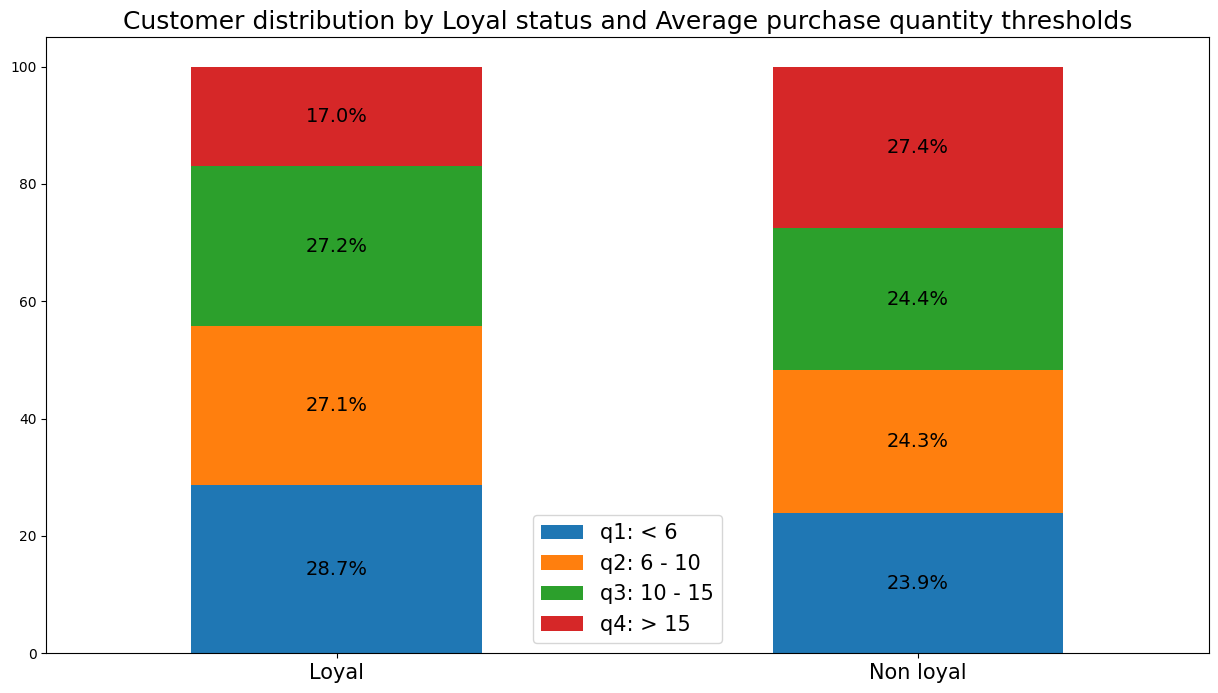

In [ ]:
# Calculate loyal_customer_volume and non_loyal_customer_volume
loyal_customer_volume = rfm_final[rfm_final['Loyal_status'] == 'Loyal']['CustomerID'].nunique()
non_loyal_customer_volume = rfm_final[rfm_final['Loyal_status'] == 'Non loyal']['CustomerID'].nunique()

# Group by Quantity_average_bin and count CustomerID
customer_volume_ofquantity = rfm_final[['CustomerID','Quantity_average_bin','Loyal_status']].groupby(['Quantity_average_bin','Loyal_status']).count().reset_index().rename(columns={'CustomerID':'Customer_volume'})

# Calculate customer percent
customer_volume_ofquantity['Customer_percent'] = customer_volume_ofquantity.apply(
    lambda x: (x.Customer_volume/loyal_customer_volume)*100 if x.Loyal_status =='Loyal' else (x.Customer_volume/non_loyal_customer_volume)*100,axis=1)

# Pivot table to prepare for plotting
df_pivot = customer_volume_ofquantity.pivot(index='Loyal_status', values='Customer_percent', columns='Quantity_average_bin')

# Plot the 100% stacked bar chart
ax= df_pivot.plot(kind='bar',stacked=True,figsize=(15,8))
for bars in ax.containers:
  ax.bar_label(bars,fmt='%.1f%%',label_type='center',color='black',fontsize=14)

plt.xlabel('')
plt.xticks(rotation=360,fontsize=15)
plt.title('Customer distribution by Loyal status and Average purchase quantity thresholds',fontsize=18)
plt.legend(fontsize=15)
plt.show()

**Loyal Customers** are group of customers whose number of quantity purchased in one order is not too large (<15 products in one transaction). This type of customer can be an individual who remains dedicated to the brand and contributes to long-term value.
**Recommendation**: Engage and attract this potential customer group through targeted advertising, marketing campaigns, and other promotional strategies.

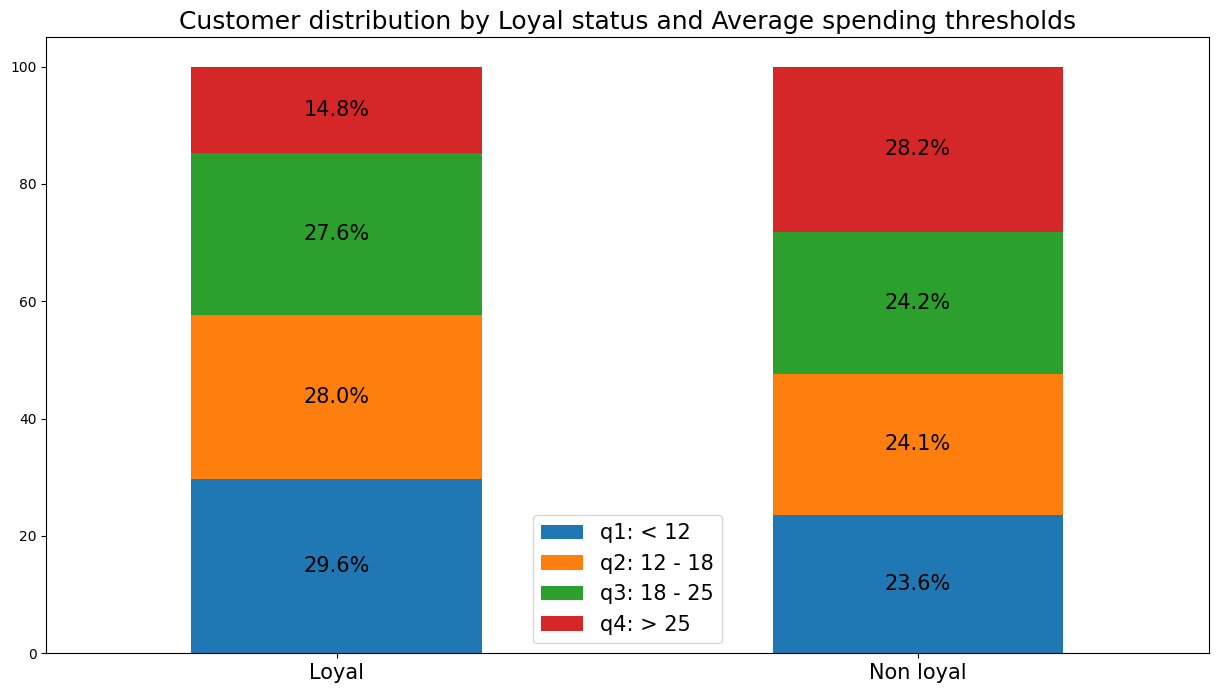

In [ ]:
# Calculate loyal and non_loyal_customer_volume
loyal_customer_volume = rfm_final[rfm_final['Loyal_status'] == "Loyal"]['CustomerID'].nunique()
non_loyal_customer_volume = rfm_final[rfm_final['Loyal_status'] == 'Non loyal']['CustomerID'].nunique()

# Group by Revenue_average_bin and count CustomerID
customer_volume_ofrevenue = rfm_final[['CustomerID','Revenue_average_bin','Loyal_status']].groupby(['Revenue_average_bin','Loyal_status'])['CustomerID'].count().reset_index().rename(columns={'CustomerID':'Customer_volume'})

# Calculate customer percent
customer_volume_ofrevenue['Customer_percent'] = customer_volume_ofrevenue.apply(
    lambda x: (x.Customer_volume/loyal_customer_volume)*100 if x.Loyal_status =='Loyal' else (x.Customer_volume/non_loyal_customer_volume)*100,axis=1)

# Pivot table to prepare for plotting
df_pivot = customer_volume_ofrevenue.pivot(index='Loyal_status',values='Customer_percent',columns='Revenue_average_bin')

# Plot the 100% stacked bar chart
ax = df_pivot.plot(kind='bar',stacked=True,figsize=(15,8))
for bars in ax.containers:
  ax.bar_label(bars,fmt='%.1f%%',label_type='center',color='black',fontsize=15)

plt.xlabel('')
plt.xticks(rotation=360,fontsize=15)
plt.title('Customer distribution by Loyal status and Average spending thresholds',fontsize=18)
plt.legend(fontsize=15)
plt.show()

**Loyal Customers** are group of customers whose spending in one order is relatively small (under 18 USD per transaction). These customers often focus on lower-priced product segments but contribute to long-term value through repeat purchases.\
**Recommendation**: Engage and attract this potential customer group through targeted advertising, marketing campaigns, and other promotional strategies.

## 5.3.Potential Market

In [ ]:
retail_final.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12,20.34


In [ ]:
total_revenue_by_country = retail_final.groupby('Country')['Revenue'].sum().reset_index().sort_values(by='Revenue',ascending=False)
total_revenue_by_country.head()

,Country,Revenue
35,United Kingdom,7250910.123
23,Netherlands,285446.340
10,EIRE,265245.960
14,Germany,227618.610
13,France,208820.100


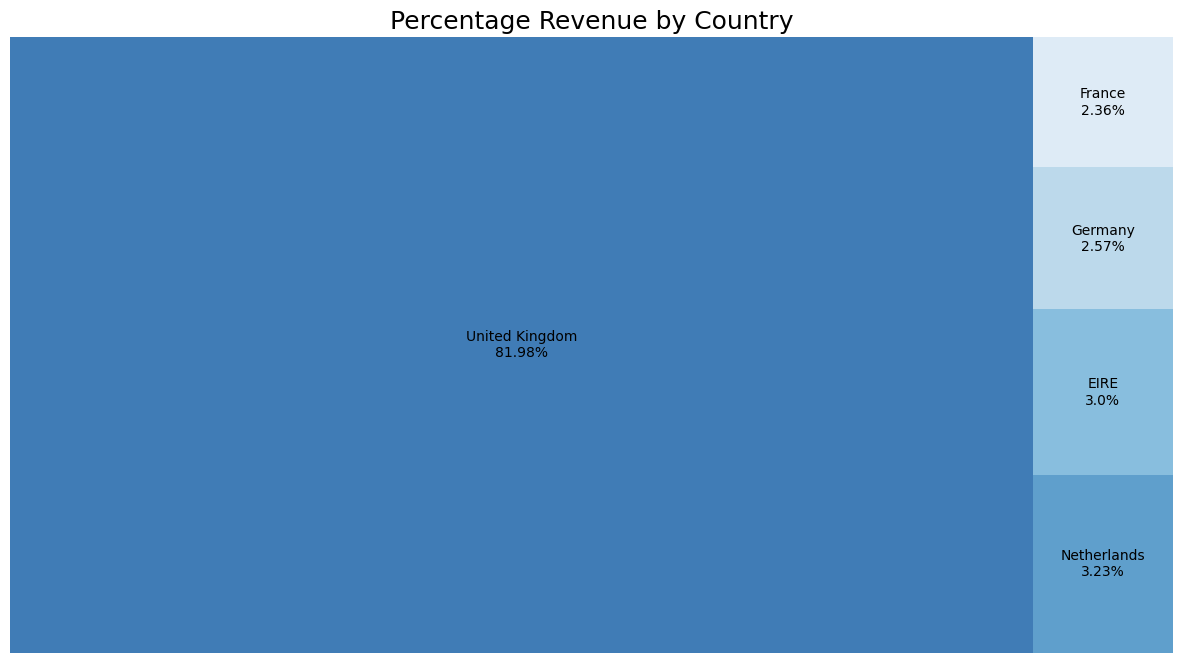

In [ ]:
# Proportion revenue by Country
total_revenue_by_country['Percentage'] = round(total_revenue_by_country['Revenue']/total_revenue_by_country['Revenue'].sum()*100,2)

# Select top 5
total_revenue_by_country_top5 = total_revenue_by_country.head(5)

colors = sns.color_palette('Blues',len(total_revenue_by_country_top5))[::-1]
plt.figure(figsize=(15,8))

squarify.plot(sizes=total_revenue_by_country_top5['Revenue'],
              label=total_revenue_by_country_top5['Country']+ "\n"+ total_revenue_by_country_top5['Percentage'].astype(str) + '%',
              alpha=.8,color=colors)
plt.title('Percentage Revenue by Country',fontsize=18)
plt.axis('off')

plt.show()

The largest market is the UK, which accounts for roughly 82% of the total revenue. Other potential markets are some European countries such as Netherlands, France, Germany.\
 **Recommendation**: Keep focusing on the UK market, implement sales and marketing campaigns in some European countries to boost customer spending.